# [Baseball Databank](http://www.seanlahman.com/baseball-archive/statistics/)

In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [235]:
# show matplotlib plots in notebook
%matplotlib inline

In [276]:
# set matplotlib style/theme
plt.style.use("fivethirtyeight")

In [366]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [278]:
# plotly defaults
pio.renderers.default = "notebook"
pio.templates.default = "seaborn"

In [9]:
# path to data files
datapath = Path("../baseballdatabank/core")

___________________
## Batting info

In [104]:
batting_all = pd.read_csv(datapath/"batting.csv")
batting_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108789 entries, 0 to 108788
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  108789 non-null  object 
 1   yearID    108789 non-null  int64  
 2   stint     108789 non-null  int64  
 3   teamID    108789 non-null  object 
 4   lgID      108052 non-null  object 
 5   G         108789 non-null  int64  
 6   AB        108789 non-null  int64  
 7   R         108789 non-null  int64  
 8   H         108789 non-null  int64  
 9   2B        108789 non-null  int64  
 10  3B        108789 non-null  int64  
 11  HR        108789 non-null  int64  
 12  RBI       108033 non-null  float64
 13  SB        106421 non-null  float64
 14  CS        85248 non-null   float64
 15  BB        108789 non-null  int64  
 16  SO        106689 non-null  float64
 17  IBB       72139 non-null   float64
 18  HBP       105973 non-null  float64
 19  SH        102721 non-null  float64
 20  SF  

## People info

In [357]:
people = pd.read_csv(datapath/"people.csv")
for col in "debut", "finalGame":
    people[col] = pd.to_datetime(people[col])
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   playerID      20093 non-null  object        
 1   birthYear     19979 non-null  float64       
 2   birthMonth    19811 non-null  float64       
 3   birthDay      19670 non-null  float64       
 4   birthCountry  20032 non-null  object        
 5   birthState    19561 non-null  object        
 6   birthCity     19919 non-null  object        
 7   deathYear     9887 non-null   float64       
 8   deathMonth    9886 non-null   float64       
 9   deathDay      9885 non-null   float64       
 10  deathCountry  9884 non-null   object        
 11  deathState    9836 non-null   object        
 12  deathCity     9878 non-null   object        
 13  nameFirst     20056 non-null  object        
 14  nameLast      20093 non-null  object        
 15  nameGiven     20056 non-null  object

In [424]:
# slimmed people dataframe with player ID, full name, first and final games as datetimes
people_slim = pd.concat([people["playerID"], 
                         people[["nameFirst", "nameLast"]].fillna("").agg(" ".join, axis=1).rename("fullName"), 
                         people["debut"].apply(lambda dt: dt.year).fillna(0).astype(np.int), 
                         people["finalGame"].apply(lambda dt: dt.year).fillna(0).astype(np.int)], 
                        axis=1)

In [425]:
people_slim

,playerID,fullName,debut,finalGame
0,aardsda01,David Aardsma,2004,2015
1,aaronha01,Hank Aaron,1954,1976
2,aaronto01,Tommie Aaron,1962,1971
3,aasedo01,Don Aase,1977,1990
4,abadan01,Andy Abad,2001,2006
...,...,...,...,...
20088,zupofr01,Frank Zupo,1957,1961
20089,zuvelpa01,Paul Zuvella,1982,1991
20090,zuverge01,George Zuverink,1951,1959
20091,zwilldu01,Dutch Zwilling,1910,1916


_____________________
## Convenience functions

In [369]:
# All-time <stat> leaders
def leaders(df_stat, df_people, stat, count=10):
    _leaders = (df_stat.pivot_table(values=stat, columns="yearID", index="playerID", fill_value=0, aggfunc=np.sum)
                  .astype(np.int)
                  .sum(axis=1)
                  .sort_values(ascending=False)
                  .rename(stat)
                  .head(count))
    return pd.merge(df_people, _leaders, on="playerID").sort_values(stat, ascending=False)

In [435]:
# Bar-plot leaders
def leaders_barplot(df, x, y, figsize=(7,6), stat_label=None):
    if stat_label is None:
        stat_label = y
    plt.figure(figsize=figsize)
    bp = sns.barplot(x=x, y=y, data=df, palette="crest_r")
    bp.set(xlabel=None, ylabel=f"{stat_label}", title=f"All-time {stat_label} Leaders")
    bp.set_xticklabels(bp.get_xticklabels(), rotation=60)
    plt.tight_layout()

# All-time batting leaders

## HR

In [394]:
hr_leaders = leaders(batting_all, people_slim, "HR", 10)
hr_leaders

,playerID,fullName,debut,finalGame,HR
1,bondsba01,Barry Bonds,1986,2007,762
0,aaronha01,Hank Aaron,1954,1976,755
7,ruthba01,Babe Ruth,1914,1935,714
6,rodrial01,Alex Rodriguez,1994,2016,696
4,pujolal01,Albert Pujols,2001,2020,662
3,mayswi01,Willie Mays,1951,1973,660
2,griffke02,Ken Griffey,1989,2010,630
9,thomeji01,Jim Thome,1991,2012,612
8,sosasa01,Sammy Sosa,1989,2007,609
5,robinfr02,Frank Robinson,1956,1976,586


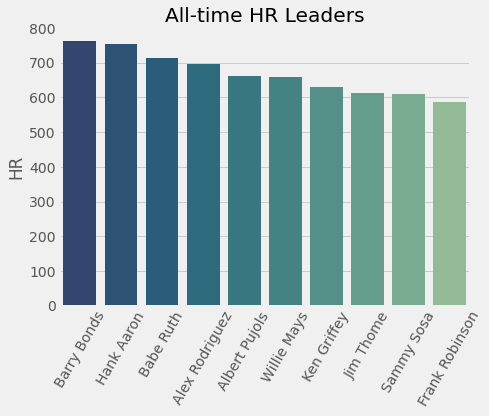

In [436]:
# seaborn plot
leaders_barplot(hr_leaders, "fullName", "HR")

------------------
**NOTE** the bizarre name difference betwen setting ```custom_data``` and using ```customdata``` 

In [430]:
# plotly plot
bp = px.bar(hr_leaders, 
            x="fullName", 
            y="HR", 
            title="All-time HR Leaders",
            custom_data=["debut", "finalGame"])
bp.update_traces(hovertemplate="<b>%{x}</b>: %{y} (%{customdata[0]}-%{customdata[1]})")
bp.update_xaxes(title=None)

## Hits

In [421]:
h_leaders = leaders(batting_all, people_slim, "H", 10)
h_leaders

,playerID,fullName,debut,finalGame,H
6,rosepe01,Pete Rose,1963,1986,4256
2,cobbty01,Ty Cobb,1905,1928,4189
0,aaronha01,Hank Aaron,1954,1976,3771
5,musiast01,Stan Musial,1941,1963,3630
7,speaktr01,Tris Speaker,1907,1928,3514
3,jeterde01,Derek Jeter,1995,2014,3465
1,ansonca01,Cap Anson,1871,1897,3435
8,wagneho01,Honus Wagner,1897,1917,3420
9,yastrca01,Carl Yastrzemski,1961,1983,3419
4,molitpa01,Paul Molitor,1978,1998,3319


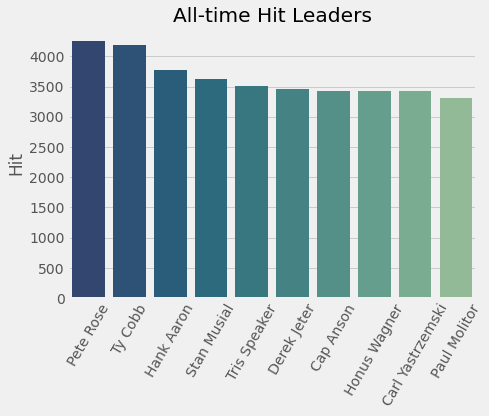

In [437]:
leaders_barplot(h_leaders, "fullName", "H", stat_label="Hit")

In [431]:
bp = px.bar(h_leaders, 
            x="fullName", 
            y="H", 
            title="All-time Hit Leaders",
            custom_data=["debut", "finalGame"])
bp.update_traces(hovertemplate="<b>%{x}</b>: %{y} (%{customdata[0]}-%{customdata[1]})")
bp.update_xaxes(title=None)
bp.update_yaxes(title="Hits")

_____________________________________________

In [493]:
stats_per_year = batting_all.pivot_table(columns="yearID", values=["HR", "RBI"], aggfunc=np.sum).astype(np.int)
stats_per_year

yearID,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
HR,47,37,47,40,40,40,24,23,58,62,...,4552,4934,4661,4186,4909,5610,6105,5585,6776,2304
RBI,1783,2132,2331,2252,2710,1984,1410,1331,2357,2223,...,19804,19998,19271,18745,19650,20745,21558,20606,22471,7978


In [492]:
# number of players
players_per_year = batting_all.pivot_table(columns="yearID", values="playerID", aggfunc=pd.DataFrame.nunique)
players_per_year

yearID,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
playerID,115,143,122,120,188,121,92,77,119,127,...,1295,1284,1304,1320,1348,1353,1358,1379,1410,1289


In [506]:
stats_per_year.divide(players_per_year.loc["playerID"], axis="columns")

yearID,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
HR,0.408696,0.258741,0.385246,0.333333,0.212766,0.330579,0.260870,0.298701,0.487395,0.488189,...,3.515058,3.842679,3.574387,3.171212,3.641691,4.146341,4.495582,4.050036,4.805674,1.787432
RBI,15.504348,14.909091,19.106557,18.766667,14.414894,16.396694,15.326087,17.285714,19.806723,17.503937,...,15.292664,15.574766,14.778374,14.200758,14.577151,15.332594,15.874816,14.942712,15.936879,6.189294


___________________________________

# Team stats

In [509]:
teams = pd.read_csv(datapath/"teams.csv")

In [625]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2955 non-null   int64  
 1   lgID            2905 non-null   object 
 2   teamID          2955 non-null   object 
 3   franchID        2955 non-null   object 
 4   divID           1438 non-null   object 
 5   Rank            2955 non-null   int64  
 6   G               2955 non-null   int64  
 7   Ghome           2556 non-null   float64
 8   W               2955 non-null   int64  
 9   L               2955 non-null   int64  
 10  DivWin          1410 non-null   object 
 11  WCWin           774 non-null    object 
 12  LgWin           2927 non-null   object 
 13  WSWin           2598 non-null   object 
 14  R               2955 non-null   int64  
 15  AB              2955 non-null   int64  
 16  H               2955 non-null   int64  
 17  2B              2955 non-null   i

In [705]:
from itertools import chain

In [707]:
def stat_per_game(stats):
    df = teams.pivot_table(index="yearID", 
                           values=chain(stats, ["G"]), 
                           aggfunc=np.sum)
    return df.divide(df["G"], axis="index") \
             .drop("G", axis=1) \
             .reset_index()

## Offense over time

In [736]:
off_stats = ["H", "R", "HR", "BB"]
off_per_game = stat_per_game(off_stats)
off_per_game.head(2)

,yearID,BB,H,HR,R
0,1871,1.547244,12.208661,0.185039,10.468504
1,1872,0.718579,12.204918,0.101093,9.262295


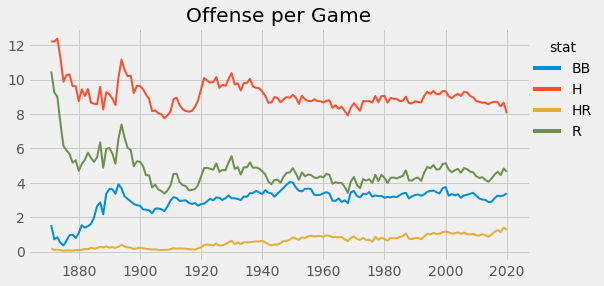

In [761]:
plt.figure(figsize=(8,4))
sns_lp = sns.lineplot(x='yearID', 
             y='value', 
             hue='variable', 
             data=pd.melt(off_per_game, ['yearID']), 
             linewidth=2)
sns_lp.set(xlabel=None, ylabel=None, title="Offense per Game")
plt.legend(title="stat", bbox_to_anchor=(1.15, 1), loc='upper right', frameon=False)

In [722]:
bp = px.line(off_per_game, 
            x="yearID",
            y=["HR", "H", "R", "BB"],
            title="Offense per Game")
bp.update_traces(hovertemplate="<b>%{x}</b><br>%{y:.3f}", line=dict(width=3))
bp.update_layout(legend=dict(title="stat"))
bp.update_xaxes(title=None)
bp.update_yaxes(title=None)
bp.show()

## Defense over time

In [756]:
# Pitching/fielding-focused, since several stats (HRA, RA, HRA, etc) are just the inverse of above
def_stats = ["SOA", "ERA", "E", "DP"]
def_per_game = stat_per_game(def_stats)
def_per_game.head(2)

,yearID,DP,E,ERA,SOA
0,1871,0.574803,7.614173,0.151339,0.688976
1,1872,0.516393,7.502732,0.128743,0.724044


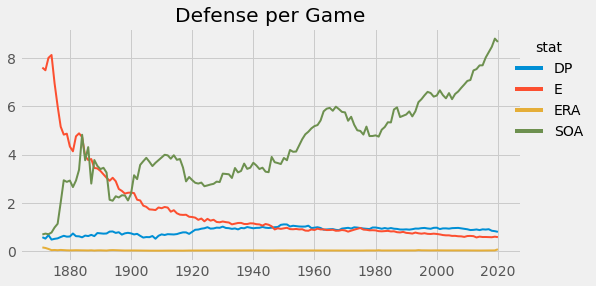

In [762]:
plt.figure(figsize=(8,4))
sns_lp = sns.lineplot(x='yearID', 
             y='value', 
             hue='variable', 
             data=pd.melt(def_per_game, ['yearID']), 
             linewidth=2)
sns_lp.set(xlabel=None, ylabel=None, title="Defense per Game")
plt.legend(title="stat", bbox_to_anchor=(1.15, 1), loc='upper right', frameon=False)

In [727]:
bp = px.line(def_per_game, 
            x="yearID",
            y=def_stats,
            title="Defense per Game")
bp.update_traces(hovertemplate="<b>%{x}</b><br>%{y:.3f}", line=dict(width=3))
bp.update_layout(legend=dict(title="stat"))
bp.update_xaxes(title=None)
bp.update_yaxes(title=None)
bp.show()

______________________________________________